In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('../../data/data.csv')

# Drop unwanted columns (ID, e_Sint as per your earlier code)
data.drop(columns=['ID', 'e_Sint'], inplace=True)

# Handle missing values
data.fillna(data.mean(numeric_only=True), inplace=True)

# Define features and target
target = 'Sint'
features = [col for col in data.columns if col != target]

X = data[features]
y = data[target]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to numpy arrays
X_scaled = np.array(X_scaled)
y = np.array(y)

# Reshape for GRU input [samples, timesteps=1, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
# Build GRU model
def build_gru_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.GRU(50, return_sequences=True),
        tf.keras.layers.GRU(50),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
model = build_gru_model((X_train.shape[1], X_train.shape[2]))
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Accuracy estimation (scaled to range of target)
y_range = np.max(y_test) - np.min(y_test)
mse_accuracy = (1 - mse / y_range) * 100
mae_accuracy = (1 - mae / y_range) * 100
rmse_accuracy = (1 - rmse / y_range) * 100

I0000 00:00:1755331851.702136    1276 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13553 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9
I0000 00:00:1755331853.524982    4660 cuda_dnn.cc:529] Loaded cuDNN version 90300


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


MSE - Value: 20.0221, Accuracy: 93.63%
MAE - Value: 0.3548, Accuracy: 99.89%
RMSE - Value: 4.4746, Accuracy: 98.58%
R2 - Value: 0.8148


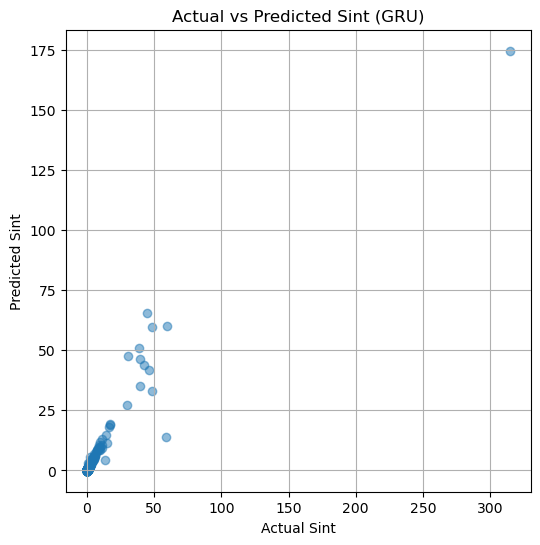

In [5]:
# Print results
print(f'MSE - Value: {mse:.4f}, Accuracy: {mse_accuracy:.2f}%')
print(f'MAE - Value: {mae:.4f}, Accuracy: {mae_accuracy:.2f}%')
print(f'RMSE - Value: {rmse:.4f}, Accuracy: {rmse_accuracy:.2f}%')
print(f'R2 - Value: {r2:.4f}')

# Plotting actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sint')
plt.ylabel('Predicted Sint')
plt.title('Actual vs Predicted Sint (GRU)')
plt.grid(True)
plt.show()

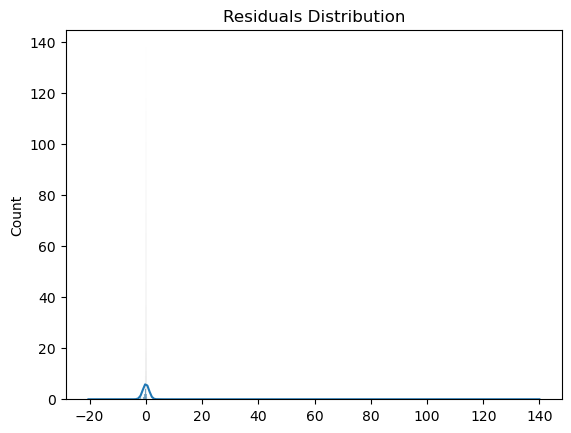

In [6]:
import seaborn as sns
residuals = y_test - y_pred.flatten()
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()


In [7]:
import time
start = time.time()
_ = model.predict(X_test[:1])
print("Inference Time (1 sample):", time.time() - start, "s")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Inference Time (1 sample): 0.05723428726196289 s
